In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [3]:
import zipfile
zipRef = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zipRef.extractall('/content')
zipRef.close()

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [12]:
#Transfer Learning To Feature Extraction(Without Data Autmentation)
convBase = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

In [13]:
convBase.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
model = Sequential()

model.add(convBase)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
convBase.trainable = False

In [34]:
trainDS = keras.utils.image_dataset_from_directory(
    directory = '/content/train', labels = 'inferred', label_mode = 'int', batch_size = 32, image_size = (150, 150)
)

validationDS = keras.utils.image_dataset_from_directory(
    directory = '/content/test', labels = 'inferred', label_mode = 'int', batch_size = 32, image_size = (150, 150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [35]:
def process(image, label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image, label

trainDS = trainDS.map(process)
validationDS = validationDS.map(process)

In [36]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
traininglog = model.fit(trainDS, epochs = 10, validation_data = validationDS)

Epoch 1/10
625/625 [==============================] - 64s 100ms/step - loss: 0.2772 - accuracy: 0.8830 - val_loss: 0.2100 - val_accuracy: 0.9092
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1969 - accuracy: 0.9186 - val_loss: 0.2142 - val_accuracy: 0.9090
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1681 - accuracy: 0.9302 - val_loss: 0.2057 - val_accuracy: 0.9140
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1508 - accuracy: 0.9398 - val_loss: 0.2148 - val_accuracy: 0.9116
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1292 - accuracy: 0.9484 - val_loss: 0.2212 - val_accuracy: 0.9120
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1088 - accuracy: 0.9558 - val_loss: 0.2409 - val_accuracy: 0.9068
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0936 - accuracy: 0.9632 - val_loss: 0.2494 - val_ac

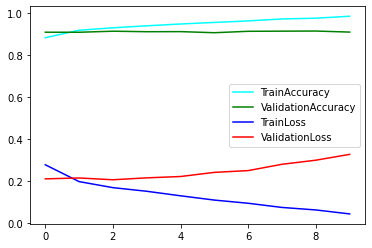

In [38]:
import matplotlib.pyplot as plt

plt.plot(traininglog.history['accuracy'], color = 'cyan', label = 'TrainAccuracy')
plt.plot(traininglog.history['val_accuracy'], color = 'green', label = 'ValidationAccuracy')
plt.plot(traininglog.history['loss'], color = 'blue', label = 'TrainLoss')
plt.plot(traininglog.history['val_loss'], color = 'red', label = 'ValidationLoss')
plt.legend()
plt.show()

In [39]:
#Transfer Learning To Feature Extraction(With Data Autmentation)
convBase = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

In [43]:
model = Sequential()

model.add(convBase)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
convBase.trainable = False

In [50]:
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batchSize = 32

trainDatagen = ImageDataGenerator(
    rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True
)

testDatagen = ImageDataGenerator(rescale = 1/255)

trainGenerator = trainDatagen.flow_from_directory(
    directory = '/content/train', target_size = (150, 150), batch_size = batchSize, class_mode = 'binary'
)

validationGenerator = testDatagen.flow_from_directory(
    directory = '/content/test', target_size = (150, 150), batch_size = batchSize, class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [52]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
traininglog = model.fit_generator(trainGenerator, epochs = 10, validation_data = validationGenerator)

<ipython-input-52-23d819ed11ca>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  traininglog = model.fit_generator(trainGenerator, epochs = 10, validation_data = validationGenerator)


Epoch 1/10
625/625 [==============================] - 171s 272ms/step - loss: 0.3069 - accuracy: 0.8683 - val_loss: 0.2233 - val_accuracy: 0.9034
Epoch 2/10
625/625 [==============================] - 164s 262ms/step - loss: 0.2380 - accuracy: 0.8996 - val_loss: 0.2977 - val_accuracy: 0.8760
Epoch 3/10
625/625 [==============================] - 162s 258ms/step - loss: 0.2231 - accuracy: 0.9033 - val_loss: 0.2025 - val_accuracy: 0.9128
Epoch 4/10
625/625 [==============================] - 163s 260ms/step - loss: 0.2119 - accuracy: 0.9094 - val_loss: 0.2108 - val_accuracy: 0.9114
Epoch 5/10
625/625 [==============================] - 162s 260ms/step - loss: 0.2021 - accuracy: 0.9140 - val_loss: 0.1974 - val_accuracy: 0.9182
Epoch 6/10
625/625 [==============================] - 167s 268ms/step - loss: 0.1911 - accuracy: 0.9181 - val_loss: 0.1932 - val_accuracy: 0.9184
Epoch 7/10
625/625 [==============================] - 164s 262ms/step - loss: 0.1834 - accuracy: 0.9216 - val_loss: 0.2069 -

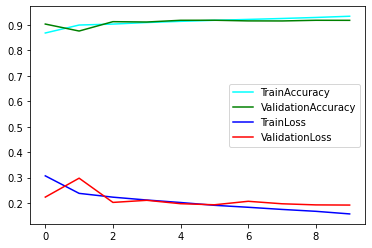

In [53]:
plt.plot(traininglog.history['accuracy'], color = 'cyan', label = 'TrainAccuracy')
plt.plot(traininglog.history['val_accuracy'], color = 'green', label = 'ValidationAccuracy')
plt.plot(traininglog.history['loss'], color = 'blue', label = 'TrainLoss')
plt.plot(traininglog.history['val_loss'], color = 'red', label = 'ValidationLoss')
plt.legend()
plt.show()

In [54]:
#Transfer Learning To Feature Extraction(With Fine Tuneing)
convBase = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

In [55]:
convBase.trainable = True

set_trainable = False

for layer in convBase.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in convBase.layers:
  print(layer.name,layer.trainable)

input_7 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [56]:
convBase.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [57]:
model = Sequential()

model.add(convBase)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2097408   
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [58]:
# generators
trainDS = keras.utils.image_dataset_from_directory(
    directory = '/content/train', labels = 'inferred', label_mode = 'int', batch_size = 32, image_size=(150,150)
)

validationDS = keras.utils.image_dataset_from_directory(
    directory = '/content/test', labels = 'inferred', label_mode = 'int', batch_size = 32, image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [59]:
# Normalize
def process(image, label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image, label

trainDS = trainDS.map(process)
validationDS = validationDS.map(process)

In [60]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
traininglog = model.fit(trainDS, epochs=10, validation_data = validationDS)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


625/625 [==============================] - 77s 120ms/step - loss: 0.2377 - accuracy: 0.8989 - val_loss: 0.1676 - val_accuracy: 0.9308
Epoch 2/10
625/625 [==============================] - 75s 119ms/step - loss: 0.1337 - accuracy: 0.9481 - val_loss: 0.1435 - val_accuracy: 0.9428
Epoch 3/10
625/625 [==============================] - 83s 133ms/step - loss: 0.0938 - accuracy: 0.9653 - val_loss: 0.1323 - val_accuracy: 0.9470
Epoch 4/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0645 - accuracy: 0.9779 - val_loss: 0.1210 - val_accuracy: 0.9496
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.1365 - val_accuracy: 0.9490
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.0272 - accuracy: 0.9933 - val_loss: 0.1300 - val_accuracy: 0.9560
Epoch 7/10
625/625 [==============================] - 83s 132ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.1450 - val_accuracy: 0.9

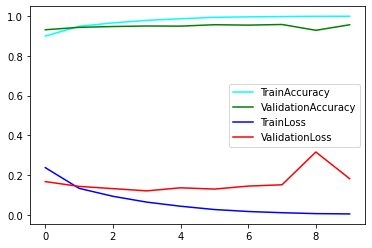

In [61]:
plt.plot(traininglog.history['accuracy'], color = 'cyan', label = 'TrainAccuracy')
plt.plot(traininglog.history['val_accuracy'], color = 'green', label = 'ValidationAccuracy')
plt.plot(traininglog.history['loss'], color = 'blue', label = 'TrainLoss')
plt.plot(traininglog.history['val_loss'], color = 'red', label = 'ValidationLoss')
plt.legend()
plt.show()